# Козловский Евгений. Домашнее задание №3.
группа БЭК-142.

### Перейдем к заданию

Загрузите [данные](https://www.dropbox.com/s/3t1moa1wpflx2u9/california.dat?dl=0).

**Задание 1:** Найти оптимальную глубину дерева.<br/>
Разделите выборку на train-test в пропорции 70/30.<br/>
Обучите деревья с глубиной от `1` до `30`. Для каждой глубины расчитайте среднюю квадратичную ошибку на train и на test<br/>
Изобразите эти ошибки на одном графике, сделайте вывод по поводу оптимальной глубины дерева.

In [59]:
import pandas as pd
import numpy as np
import csv
import sklearn
from sklearn import tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
df = pd.read_csv('california.dat', sep=',', skiprows=0)

#Стандартизируем признаки и создаем новый дата-фрейм.
df_new = df.iloc[:, :8]
mean = df_new.mean(axis=0)
std = df_new.std(axis=0)
df_new = (df_new - mean) / std
df_new
df_final = pd.concat([df_new, df['MedianHouseValue']], axis=1)
df_final

#Перемешиваем значения.
idx = np.arange(df_final.shape[0])
np.random.shuffle(idx)
df_final = df_final.iloc[idx, :]

#Разбиваем выборку на train/test.
X_train = df_final.iloc[1:int(df_final.shape[0]*0.7), :8]
X_test = df_final.iloc[int(df_final.shape[0]*0.7):, :8]
y_train = df_final.iloc[1:int(df_final.shape[0]*0.7), 8]
y_test = df_final.iloc[int(df_final.shape[0]*0.7):, 8]

error_train = []
error_test = []
importance = []

for i in range(1,31):
    regr = tree.DecisionTreeRegressor(max_depth=i)
    regr.fit(X_train, y_train)
    #для подсчета MSE используем встроенную функцию "mean_squared_error"
    error_train.append(mean_squared_error(y_train, regr.predict(X_train))**(1/2))
    error_test.append(mean_squared_error(y_test, regr.predict(X_test))**(1/2))
    importance.append(regr.feature_importances_)
    print('max_depth'+'='+str(i),'train_error:',mean_squared_error(y_train, regr.predict(X_train))**(1/2), 'test_error:',
          mean_squared_error(y_test, regr.predict(X_test))**(1/2))

max_depth=1 train_error: 95583.163189 test_error: 96540.2467535
max_depth=2 train_error: 85494.2024816 test_error: 86559.0850195
max_depth=3 train_error: 81615.4461297 test_error: 82908.8998825
max_depth=4 train_error: 76634.7221923 test_error: 78236.4942606
max_depth=5 train_error: 72393.7073358 test_error: 75298.3538057
max_depth=6 train_error: 68108.9564906 test_error: 71524.1621866
max_depth=7 train_error: 64177.9705193 test_error: 68521.0040045
max_depth=8 train_error: 58039.0958079 test_error: 64727.4393147
max_depth=9 train_error: 52635.9723002 test_error: 63154.1285842
max_depth=10 train_error: 47149.6684656 test_error: 63388.7960415
max_depth=11 train_error: 42376.9978485 test_error: 62527.1485246
max_depth=12 train_error: 37156.7551292 test_error: 63530.7243955
max_depth=13 train_error: 32184.3733344 test_error: 64363.4937986
max_depth=14 train_error: 27528.9224407 test_error: 65621.3494492
max_depth=15 train_error: 23486.4093222 test_error: 66733.8235422
max_depth=16 train_e

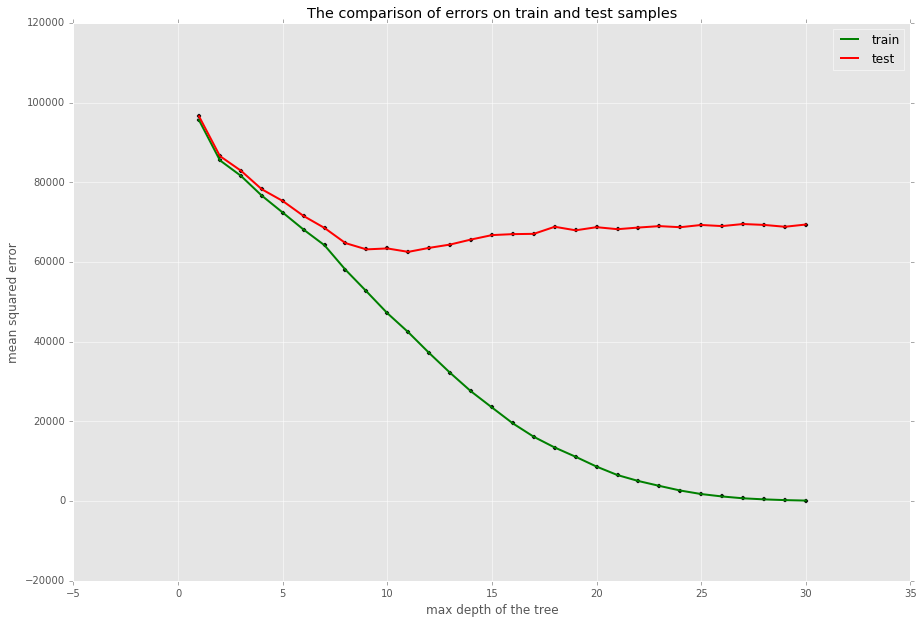

In [60]:
plt.figure()
plt.scatter(e, error_train, c="k")
plt.scatter(e, error_test, c="k")
plt.plot(e, error_train, c="g", label="train", linewidth=2)
plt.plot(e, error_test, c="r", label="test", linewidth=2)
plt.xlabel("max depth of the tree")
plt.ylabel("mean squared error")
plt.title("The comparison of errors on train and test samples")
plt.legend()
plt.show()

Вывод: оптимальная глубина дерева = 11

Очевидно, что до определенного момента среднеквадратичная ошибка уменьшается, однако дальше происходит переобучение, ведущее к росту среднеквадратичной ошибки на тестовой выборке.

**Задание 2:** Выведите важности признаков. Для этого воспользуйтесь `DecisionTreeRegressor.feature_importances_`

In [65]:
for i in range(1,31):
    print('max_depth='+str(i)+':', importance[i-1])

max_depth=1: [ 0.  0.  0.  0.  0.  0.  0.  1.]
max_depth=2: [ 0.  0.  0.  0.  0.  0.  0.  1.]
max_depth=3: [ 0.          0.02552579  0.05692367  0.          0.          0.          0.
  0.91755054]
max_depth=4: [ 0.05900286  0.04481525  0.05974667  0.00232712  0.          0.          0.
  0.8341081 ]
max_depth=5: [ 0.09179173  0.0646521   0.06335765  0.00381974  0.0053671   0.
  0.00117594  0.76983574]
max_depth=6: [ 0.1159745   0.09328568  0.0589209   0.00355226  0.00337306  0.
  0.00330537  0.72158824]
max_depth=7: [  1.20544781e-01   1.23793987e-01   5.80965447e-02   4.71499389e-03
   3.54381743e-03   1.13011230e-04   3.09864115e-03   6.86094223e-01]
max_depth=8: [ 0.16470036  0.1241632   0.05685071  0.00694057  0.00500359  0.00233981
  0.00305948  0.63694228]
max_depth=9: [ 0.16621791  0.14856046  0.05765099  0.00662285  0.00626261  0.00466053
  0.00514578  0.60487888]
max_depth=10: [ 0.18033598  0.14908185  0.05860906  0.01062312  0.01016419  0.00625555
  0.00707618  0.57785406]
m

**Задание 3:** Поразмышляйте на темы:
* Обработки пропусков в данных.
* Как сделать разделяющие плоскости непараллельные осям?

Если имеется ситуация, при которой для данного объекта $x$ мы не можем вычислить $i$-ый признак (из-за пропусков в данных), который нужен для того, чтобы определить, в какую часть деревева "пойдет" данный объект, то мы используем априорную вероятность (частоту) отнесения объекта к левой и правой стороне дерева, подсчитанной на обучающей выборке. Вычисляя на каждой вершине в случае пропусков данных такие вероятности, мы в конечном итоге можем подсчитать вероятность того, что объект $x$ принадлежит к $j$-ому классу и выберем среди этих классов тот, вероятность принадлежности к которому объекта $x$ максимальна, что вполне естественно.

Для того чтобы сделать разделяющие плоскости непараллельные осям, нужно в каждой вершине накладывать условие не на один параметр, а на линейную комбинацию нескольких параметров, например вместо $x>3$ новое условие может выглядеть как $0.4x+0.6y>7$, но при этом данный метод будет, естественно, менее эффективным с точки зрения времени выполнения, однако с его помощью можно решать относительно сложные задачи классификации.